In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [7]:
#clean the data
df = df[((df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975)))]

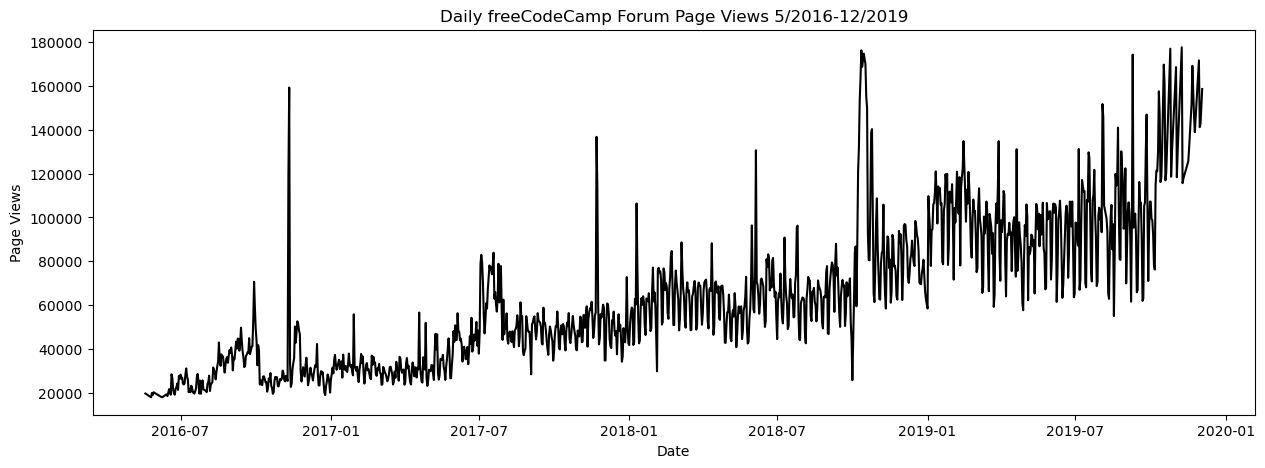

In [43]:
#Draw a line chart
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(df.index, df.value, color = 'black')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

#Graph inicates a gradual increase with in viewes with voletile presence

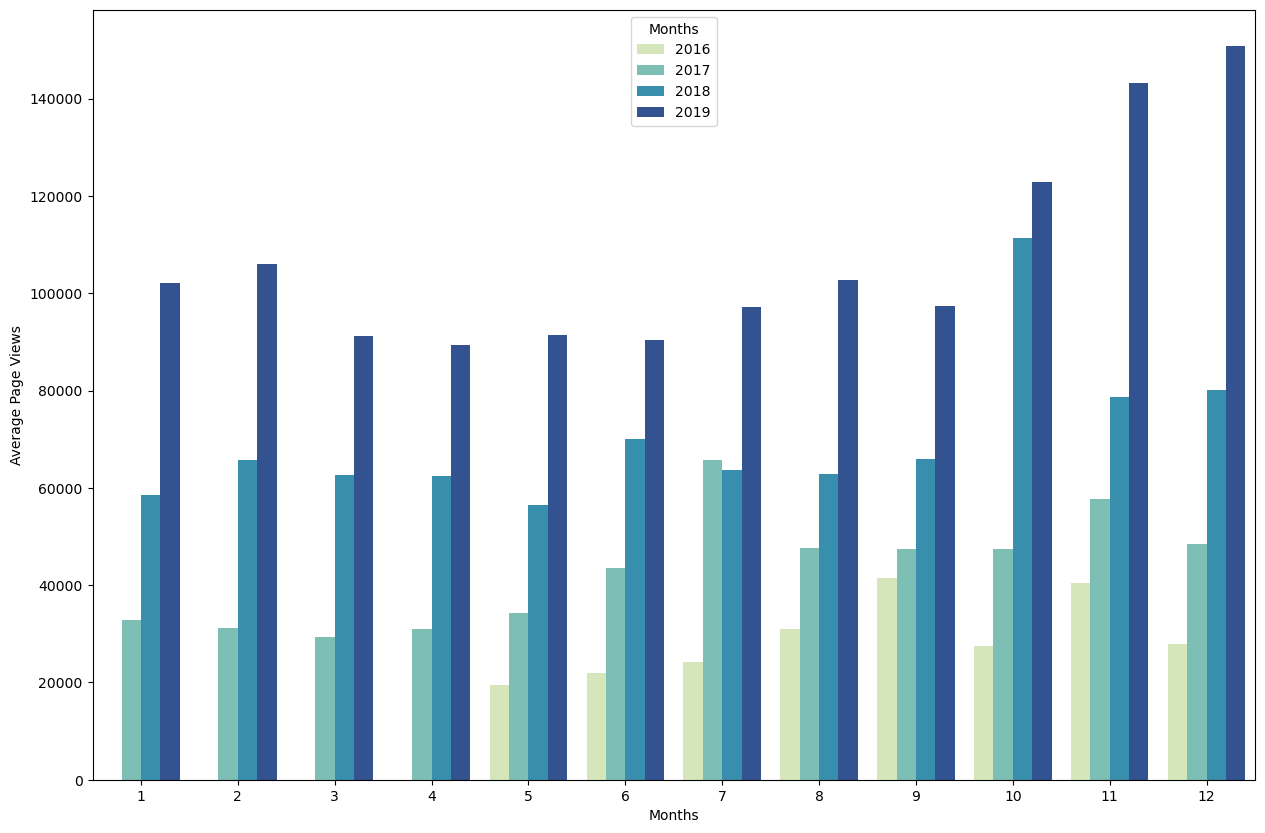

In [40]:
#Draw a bar chart

# Copy and modify data for monthly bar plot
df_bar = df.copy()
#To add the month column and set the month name
df_bar['month'] = df_bar.index.month
#To add the year column and set the year name
df_bar['year'] = df_bar.index.year



# Draw bar plot
fig, ax = plt.subplots(figsize=(15,10))
df_bar = df_bar.groupby(['year', 'month']).value.mean().reset_index()
sns.barplot(data = df_bar, x='month', y='value', hue='year', palette='YlGnBu')
plt.xlabel('Months')
plt.ylabel('Average Page Views')
plt.legend(title='Months')
plt.show()

[Text(0, 0, 'May'),
 Text(1, 0, 'Jun'),
 Text(2, 0, 'Jul'),
 Text(3, 0, 'Aug'),
 Text(4, 0, 'Sep'),
 Text(5, 0, 'Oct'),
 Text(6, 0, 'Nov'),
 Text(7, 0, 'Dec'),
 Text(8, 0, 'Jan'),
 Text(9, 0, 'Feb'),
 Text(10, 0, 'Mar'),
 Text(11, 0, 'Apr')]

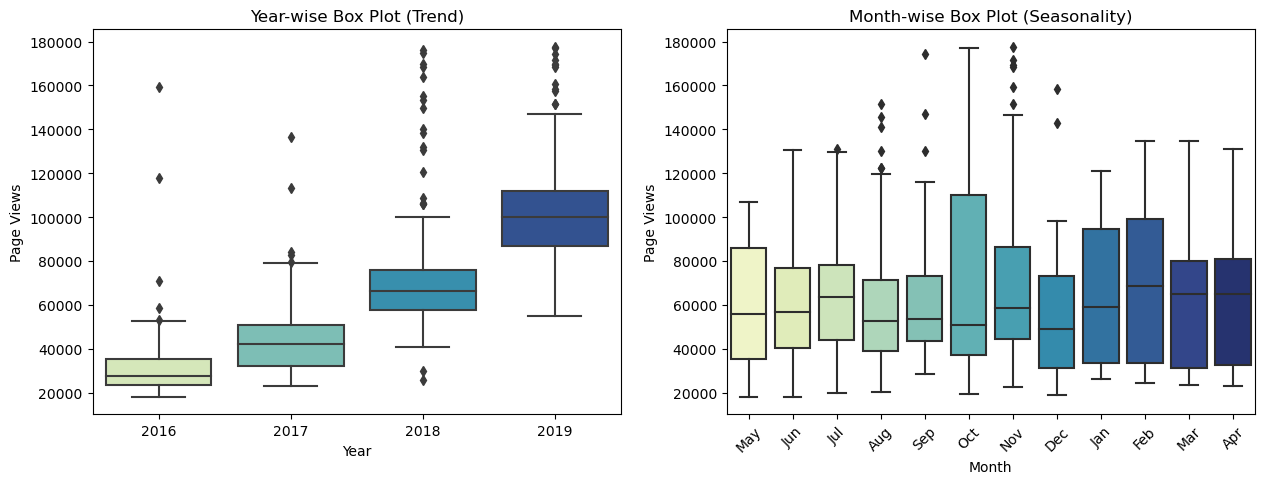

In [44]:
#Draw a box plot
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df_box, x='year', y='value', ax=ax1,palette='YlGnBu')
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

sns.boxplot(data=df_box, x='month', y='value', ax=ax2,palette='YlGnBu')
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)